# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [28]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'
rt = pd.read_csv(url, encoding = 'latin1')

In [5]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

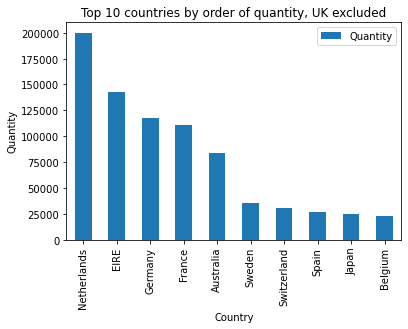

In [23]:
countries = rt.groupby('Country').sum()[['Quantity']].sort_values('Quantity', ascending = False)
top_10 = countries.iloc[1:11]
top_10.plot(kind = 'bar')
plt.xlabel('Country');
plt.ylabel('Quantity');
plt.title('Top 10 countries by order of quantity, UK excluded');

### Step 5.  Exclude negative Quantity entries

In [31]:
mask = rt.Quantity > 0
rt_pos = rt[mask]

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

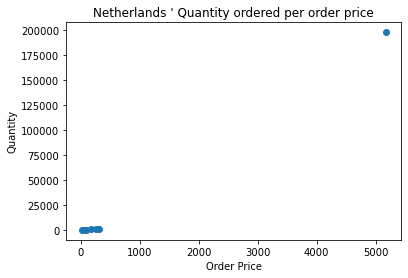

In [73]:
customers = rt_pos.groupby(['CustomerID','Country']).sum()

top3 = ['Netherlands', 'EIRE', 'Germany']

customers.head(20)

customers['Country'] = customers.index.get_level_values(1) #create a column country from the multindex

NH_customers = customers[customers.Country == 'Netherlands']
EIRE_customers = customers[customers.Country == 'EIRE']
GER_customers = customers[customers.Country == 'Germany']


##graph


plt.scatter(x = NH_customers.UnitPrice, y = NH_customers.Quantity);
plt.xlabel('Order Price');
plt.ylabel('Quantity');
plt.title('Netherlands \' Quantity ordered per order price');


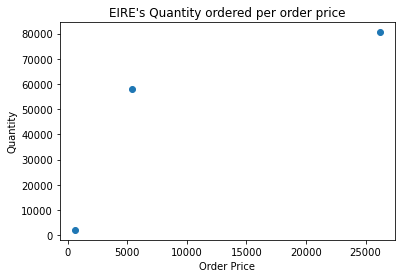

In [70]:
plt.scatter(x = EIRE_customers.UnitPrice, y = EIRE_customers.Quantity);
plt.xlabel('Order Price');
plt.ylabel('Quantity');
plt.title('EIRE\'s Quantity ordered per order price');


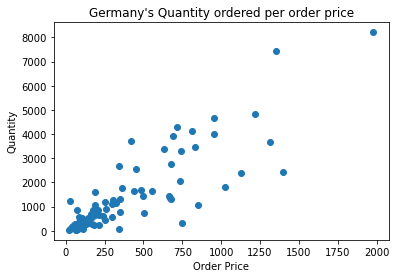

In [71]:
plt.scatter(x = GER_customers.UnitPrice, y = GER_customers.Quantity);
plt.xlabel('Order Price');
plt.ylabel('Quantity');
plt.title('Germany\'s Quantity ordered per order price');

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [75]:
customers.head()

,,Quantity,UnitPrice,Country
CustomerID,Country,,,
12346.0,United Kingdom,74215,1.04,United Kingdom
12347.0,Iceland,2458,481.21,Iceland
12348.0,Finland,2341,178.71,Finland
12349.0,Italy,631,605.10,Italy
12350.0,Norway,197,65.30,Norway


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [79]:
customers.UnitPrice.dtype #float64



dtype('float64')

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [85]:
display(rt_pos[rt_pos.CustomerID == 12346.0])
display(rt_pos[rt_pos.CustomerID == 12347.0])

##Some do bulk orders while others multiply the orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [94]:
sales_volume = rt_pos.groupby('Country').sum()[['Quantity']].sort_values('Quantity', ascending = False)
top3 = sales_volume.iloc[1:4].index
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [96]:
rt_pos['Revenue'] = rt_pos.Quantity*rt_pos.UnitPrice
rt_pos.head()

<ipython-input-96-6ab04c7aab6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_pos['Revenue'] = rt_pos.Quantity*rt_pos.UnitPrice


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [110]:
grouped = rt_pos[rt_pos.Country.isin(top3)].groupby(['CustomerID','Country']) #create the groupby object

grouped = grouped[['Quantity','Revenue']].sum() #Sum what can be summed only! quantity and revenues. 
#It doesn't make sense to sum UnitPrice
grouped['AvgPrice'] = grouped.Revenue / grouped.Quantity #From this sum per customerID per Country, we can compute
# an average price that makes sense
grouped['Country'] = grouped.index.get_level_values(1) #we add a column for the country from the multi-index
grouped

,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany
...,...,...,...,...,...
14016.0,EIRE,2125,4341.21,2.042922,EIRE
14156.0,EIRE,57885,117379.63,2.027807,EIRE
14335.0,Germany,379,468.26,1.235515,Germany


##### Step 7.3.3 Plot

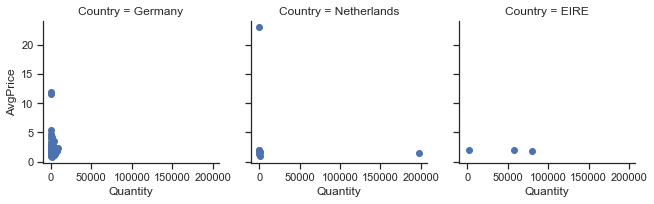

In [118]:
####################
# Graph Section v 2#
####################

# creates the FaceGrid
g = sns.FacetGrid(grouped, col="Country") #https://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facetgrid#seaborn.FacetGrid
# multi-plot grid for plotting conditional relationships. First argument has to be the dataframe; col = 'Country'
#defines subsets of the data, which will be drawn on separate facets in the grid.

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha = 1) #https://seaborn.pydata.org/generated/seaborn.FacetGrid.map.html?highlight=map#seaborn.FacetGrid.map
#map applies to a FacetGrid with first argument being the plot function we want to use (here plt.scatter)
# "Quantity" is interpreted as the x-coordinate while "AvgPrice" is the y_coordinate
#alpha is just a transparency parameter for the dots

# adds legend
g.add_legend(); #built-in legend function for FacetGrid type of object

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

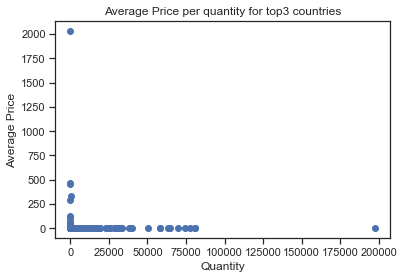

In [122]:
grouped = rt_pos.groupby('CustomerID')
grouped = grouped[['Quantity','Revenue']].sum()
grouped['AvgPrice'] = grouped.Revenue/grouped.Quantity

plt.scatter(x = grouped.Quantity, y = grouped.AvgPrice);
plt.xlabel('Quantity');
plt.ylabel('Average Price');
plt.title('Average Price per quantity for top3 countries');

##### Step 7.4.2 Zoom in so we can see that curve more clearly

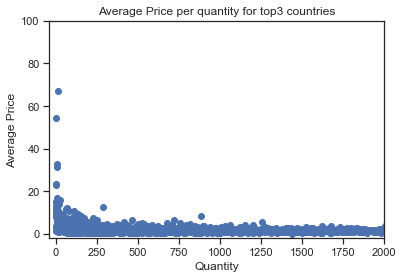

In [127]:

plt.scatter(x = grouped.Quantity, y = grouped.AvgPrice);
plt.xlabel('Quantity');
plt.ylabel('Average Price');
plt.title('Average Price per quantity for top3 countries');

plt.xlim(-40,2000);
plt.ylim(-2, 100);

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [128]:
#These are the values for the graph.
#They are used both in selecting data from
#the DataFrame and plotting the data so I've assigned
#them to variables to increase consistency and make things easier
#when playing with the variables.
price_start = 0 
price_end = 50
price_interval = 1

#Creating the buckets to collect the data accordingly
buckets = np.arange(price_start,price_end,price_interval) #creating the price buckets of interval 1

#Select the data and sum
revenue_per_price = rt_pos.groupby(pd.cut(rt_pos.UnitPrice, buckets)).Revenue.sum() #pd.cut allows to create 
#buckets of prices. We then select the Revenue column to group by and sum

revenue_per_price.head()

UnitPrice
(0, 1]    1.107775e+06
(1, 2]    2.691765e+06
(2, 3]    2.024143e+06
(3, 4]    8.651018e+05
(4, 5]    1.219377e+06
Name: Revenue, dtype: float64

#### 8.3 Plot.

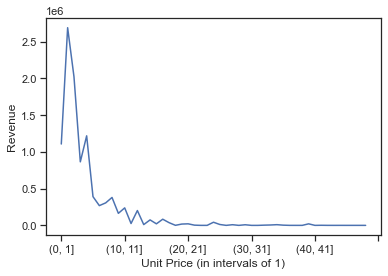

In [132]:
revenue_per_price.plot(); #simplest lineplot here
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')');
plt.ylabel('Revenue');

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

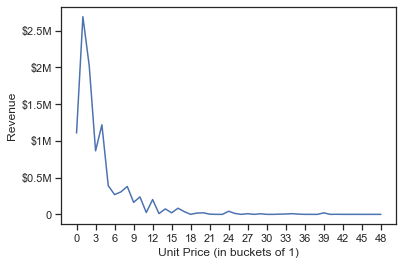

In [135]:
revenue_per_price.plot()

#Place labels
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')

#Even though the data is bucketed in intervals of 1,
#I'll plot ticks a little bit further apart from each other to avoid cluttering.
plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3)) #creates xticks on the x axis: first argument creates the place of 
                                               #the ticks, second argument place labels under the ticks
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M']) #creates yticks on the yaxis: first argument the place 
                                                           #of the ticks, second argument place labels under the ticks
plt.show()

#Looks like a major chunk of our revenue comes from items worth $0-$3!

### BONUS: Create your own question and answer it.